# Modelos Multivariados

A diferencia de los métodos estadísticos bivariados, que combinan el inventario de movimientos en masa con cada variable por separado, los métodos estadísticos multivariados evalúan la relación combinada entre la variable dependiente (la ocurrencia de movimientos en masa) y todas variables independientes (variables predictoras) en simultanea. Entre estos métodos se encuentra la regresión logística, la cual ha sido el método mas utilizado alrededor del mundo para evaluar la susceptibilidad por movimientos en masa; al igual que el método de análisis discriminante lineal, el cual es el exigido en los estudios de amenaza en los Planes de Ordenación y Manejo de Cuencas (POMCA) en Colombia.

Regresión Logistica

# Settings

In [1]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.7 MB/s 


In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame

# Variables

(1389506,)

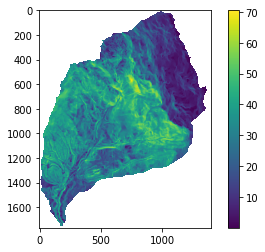

In [3]:
# Slope.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
pendiente = raster.read(1);

# nan limits.
lowerSlopeLimit = 0;
upperSlpoeLimit = 90;

# Reclasify nan.
pendiente = np.where(pendiente < lowerSlopeLimit, np.nan, pendiente);
pendiente = np.where(pendiente > upperSlpoeLimit, np.nan, pendiente);

# Render info.
plt.imshow(pendiente)
plt.colorbar();

# Vector
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

[0.0000000e+00 6.7693852e-03 6.9500757e-03 ... 3.5999222e+02 3.5999310e+02
           nan]


(1389506,)

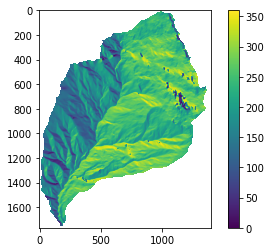

In [4]:
# Aspect.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_ASPECT_2m.tif?raw=true');
aspecto=raster.read(1);

# nan limits.
lowerAspectLimit = -1;
upperAspectLimit = 360;

# Reclasify nan.
aspecto=np.where(aspecto < lowerAspectLimit, np.nan, aspecto);
aspecto=np.where(aspecto > upperAspectLimit, np.nan, aspecto);

# Render info.
print(np.unique(aspecto));
plt.imshow(aspecto);
plt.colorbar();

# Vector
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
aspecto_vector_MenM.shape

(1768, 1394)
[ 1.  2.  3. nan]
(1389506,)


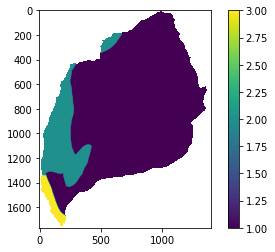

In [5]:
# Geology.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_GEO.tif?raw=true');
geologia = raster.read(1);
print(np.shape(geologia));

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
geologia = msk * geologia;

# nan limits.
lowerGeologyLimit = 1;
upperGeologyLimit = 3;

# Reclasify nan.
geologia = np.where(geologia < lowerGeologyLimit, np.nan, geologia);
geologia = np.where(geologia > upperGeologyLimit, np.nan, geologia);

# Render info.
print(np.unique(geologia));
plt.imshow(geologia);
plt.colorbar();

# Vector
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
print(geologia_vector_MenM.shape)

(1389506,)

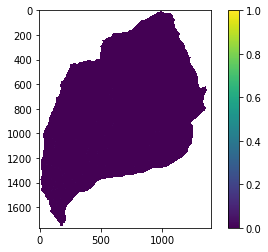

In [7]:
# Inventario

raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller4_InventarioMenM/AOI_MenM.tif?raw=true')
inventario=raster.read(1)

inventario=np.where(inventario<0,0,1)

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
inventario = msk * inventario;

inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

# Process

In [8]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM, 'aspecto': aspecto_vector_MenM,'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
df.head

<bound method NDFrame.head of          inventario  pendiente     aspecto  geologia
0               0.0   9.761349  249.823837       1.0
1               0.0   9.097123  261.704651       1.0
2               0.0   9.127325  266.537048       1.0
3               0.0   9.400720  268.394501       1.0
4               0.0   9.616394  268.947296       1.0
...             ...        ...         ...       ...
1389501         0.0  20.048634   64.467285       3.0
1389502         0.0  22.537170   60.598751       3.0
1389503         0.0  24.178869   57.509243       3.0
1389504         0.0  24.687258   54.332764       3.0
1389505         0.0  29.303827   51.747425       3.0

[1389506 rows x 4 columns]>

In [9]:
var_names2=['aspecto','pendiente']
for var in var_names2:
    df[var]=(df[var]-df[var].mean())/df[var].std()
df.head()

,inventario,pendiente,aspecto,geologia
0,0.0,-1.313825,0.473774,1.0
1,0.0,-1.360973,0.648986,1.0
2,0.0,-1.358829,0.720251,1.0
3,0.0,-1.339423,0.747644,1.0
4,0.0,-1.324114,0.755796,1.0


In [10]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "inventario ~ pendiente + C(geologia)", data = df).fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.000523
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:              1389506
Model:                          Logit   Df Residuals:                  1389502
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                 0.03444
Time:                        16:45:26   Log-Likelihood:                -726.88
converged:                       True   LL-Null:                       -752.81
Covariance Type:            nonrobust   LLR p-value:                 3.215e-11
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -10.4518      0.175    -59.562      0.000     -10.796     -10.108
C(ge

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced', solver='newton-cg')
model

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [17]:
X=df.drop("inventario", axis=1)
y=df['inventario']
X.head()

,pendiente,aspecto,geologia
0,-1.313825,0.473774,1.0
1,-1.360973,0.648986,1.0
2,-1.358829,0.720251,1.0
3,-1.339423,0.747644,1.0
4,-1.324114,0.755796,1.0


In [18]:
dummy_geologia=pd.get_dummies(X['geologia'],prefix='geo')
column_name=X.columns.values.tolist()
column_name.remove('geologia')
X1=X[column_name].join(dummy_geologia)
X1.head()

,pendiente,aspecto,geo_1.0,geo_2.0,geo_3.0
0,-1.313825,0.473774,1,0,0
1,-1.360973,0.648986,1,0,0
2,-1.358829,0.720251,1,0,0
3,-1.339423,0.747644,1,0,0
4,-1.324114,0.755796,1,0,0


In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced', solver='newton-cg')
model

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [29]:
result=model.fit(X1,y)
print(result.coef_)

[[ 0.49394628 -0.09633729 -0.9802589   0.10196157  1.314651  ]]


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [30]:
y_pred=result.predict(X1)
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [31]:
y_prob=result.predict_proba(X1)
y_prob

array([[0.7748723 , 0.22512771],
       [0.78180194, 0.21819809],
       [0.78279084, 0.21720918],
       ...,
       [0.1373356 , 0.8626644 ],
       [0.13471055, 0.86528945],
       [0.11655456, 0.88344544]], dtype=float32)

In [32]:
y_probs=result.predict_proba(X1)[:,1]
y_probs

array([0.22512771, 0.21819809, 0.21720918, ..., 0.8626644 , 0.86528945,
       0.88344544], dtype=float32)

In [33]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)

In [34]:
f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2}
x_map=pd.DataFrame(f)
dummy_geologia=pd.get_dummies(x_map['geologia'],prefix='geo')
column_name=x_map.columns.values.tolist()
column_name.remove('geologia')
x_map=x_map[column_name].join(dummy_geologia)
x_map=x_map.drop('geo_0.0',axis=1)

In [35]:
y_pred=model.predict_proba(x_map)[:,1]
print(y_probs) 

[0.22512771 0.21819809 0.21720918 ... 0.8626644  0.86528945 0.88344544]


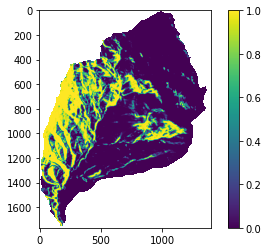

In [37]:
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
IS = msk * IS;

plt.imshow(IS)
plt.colorbar();